# Data Quality Assessment and Data Cleaning

In [1]:
#pip install openpyxl --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from datetime import datetime, date
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
file = pd.ExcelFile("C:/Users/Hoa Binh/OneDrive/Desktop/New folder/Customer segmentation.xlsx")
Transactions = pd.read_excel(file, 'Transactions')
NewCustomerlst = pd.read_excel(file, 'NewCustomerList')
CustomerDemo = pd.read_excel(file, 'CustomerDemographic')
CustomerAddress = pd.read_excel(file, 'CustomerAddress')

In [3]:
Transactions.info()
Transactions.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [4]:
null_data = Transactions.loc[Transactions['online_order'].isnull()]

In [5]:
null_data['online_order'] = null_data['online_order'].apply(lambda v: np.random.choice([0.0, 1.0]))
Transactions['online_order'].fillna(null_data['online_order'], inplace=True)

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10048\2844174381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_data['online_order'] = null_data['online_order'].apply(lambda v: np.random.choice([0.0, 1.0]))


In [6]:
Transactions.loc[pd.isnull(Transactions.brand)] # Obeserve NA rows -> No pattern spotted -> Drop all NA rows (197 rows)
Transactions = Transactions.dropna()
Transactions['Profit'] = Transactions['list_price'] - Transactions['standard_cost']

## Transaction dataset 
Total records (rows) in the Transaction Dataset : 19803 \
Total features (columns) in the Transaction Dataset : 14 \
There were 7 columns were Missing values were present. \
For such columns based on the volumne of the missing values either the records were dropped or appropiate values were imputed at places of missing values. \
A new feature column 'Profit' was created which is basically the difference between list price and standard price. \
There was no data inconsistency. \
Checked whether there are duplicate records present in the dataset. In this dataset there were no duplicate records.

In [7]:
NewCustomerlst.info()
NewCustomerlst.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [8]:
NewCustomerlst.loc[pd.isnull(NewCustomerlst.last_name)]
NewCustomerlst['last_name'].fillna('None', inplace = True) # Fill all missing rows with 'None'
NewCustomerlst = NewCustomerlst[NewCustomerlst['DOB'].notna()] # Filter for only rows with non-missing values
NewCustomerlst['job_title'].fillna('None', inplace = True) # Fill all missing rows with 'None'
NewCustomerlst['job_industry_category'].fillna('None', inplace = True) # Fill all missing rows with 'None'
NewCustomerlst = NewCustomerlst.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20'], axis =1) # Drop all irrelavant columns

In [9]:
# Extracting customers' age based on their DOB
NewCustomerlst['DOB'] = pd.to_datetime(NewCustomerlst['DOB'])
now = pd.Timestamp('now')
NewCustomerlst['age'] = np.floor(((now - NewCustomerlst['DOB']).dt.days / 365.25))

# Grouping customers into bins based on their age
age_group = [20,30,40,50,60,70,80,90]
labels = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89']
NewCustomerlst['age_group'] = pd.cut(NewCustomerlst['age'], bins=age_group, labels=labels, right=False)
NewCustomerlst['age_group'] = NewCustomerlst['age_group'].cat.add_categories('unknown').fillna('unknown')
NewCustomerlst = NewCustomerlst[NewCustomerlst['age_group'] != 'unknown'] # Remove outliers customers' age
NewCustomerlst.age_group = NewCustomerlst.age_group.cat.remove_unused_categories()
NewCustomerlst.age_group.value_counts()

age_group
40-49    202
50-59    184
60-69    174
20-29    129
70-79    118
30-39    112
80-89     64
Name: count, dtype: int64

## New Customers list dataset
5 Irrelevent column was present and such columns were dropped from the dataset. \
There were 4 columns were Missing values were present. For such columns based on the volumne of the missing values either the records were dropped or appropiate values were imputed at places of missing values \
There was no data inconsistency. \
Checked whether there are duplicate records present in the dataset. In this dataset there were no duplicate records.

In [10]:
CustomerAddress.info()
CustomerAddress.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

## Customer Address dataset 
For states column there was no standardisation of data. Based on the values available the column data was standardised to remove data inconsistency. \
There were certain customer IDs from Customer Dempgraphics table which were getting dropped in the Address table.

In [11]:
CustomerDemo.info()
CustomerDemo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [12]:
# CustomerDemo = CustomerDemo.drop('default', axis =1) # Drop all irrelavant columns
CustomerDemo['last_name'].fillna('None', inplace = True)# Fill all missing rows with 'None'
CustomerDemo = CustomerDemo[CustomerDemo['DOB'].notna()] # Filter for only rows with non-missing values
CustomerDemo['job_title'].fillna('None', inplace = True) # Fill all missing rows with 'None'
CustomerDemo['job_industry_category'].fillna('None', inplace = True) # Fill all missing rows with 'None'

CustomerDemo['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male'}, inplace=True)

In [13]:
# Create a new 'Age' column for customer segmentation
CustomerDemo['DOB'] = pd.to_datetime(CustomerDemo['DOB'])
now = pd.Timestamp('now')
CustomerDemo['age'] = np.floor(((now - CustomerDemo['DOB']).dt.days / 365.25))

In [14]:
# Grouping customers into bins based on their age
age_group = [20,30,40,50,60,70,80,90]
labels = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89']
CustomerDemo['age_group'] = pd.cut(CustomerDemo['age'], bins=age_group, labels=labels, right=False)
CustomerDemo['age_group'] = CustomerDemo['age_group'].cat.add_categories('unknown').fillna('unknown')
print(CustomerDemo[CustomerDemo['age_group'] == 'unknown'])
CustomerDemo = CustomerDemo[CustomerDemo['age_group'] != 'unknown'] # Drop 2 rows where customer's age is outliers
CustomerDemo = CustomerDemo.drop(['DOB','default'], axis =1) # Drop all irrelavant data features

     customer_id first_name last_name gender  \
33            34   Jephthah  Bachmann      U   
719          720     Darrel     Canet   Male   

     past_3_years_bike_related_purchases        DOB           job_title  \
33                                    59 1843-12-21     Legal Assistant   
719                                   67 1931-10-23  Recruiting Manager   

    job_industry_category     wealth_segment deceased_indicator  \
33                     IT  Affluent Customer                  N   
719                Retail  Affluent Customer                  N   

                default owns_car  tenure    age age_group  
33                  NaN       No    20.0  180.0   unknown  
719  1;DROP TABLE users       No     6.0   92.0   unknown  


## Customer Demo dataset
Total records (rows) in the Customer Demographics Dataset : 3912 \
Total features (columns) in the Customer Demographics Dataset : 13 \
1 Irrelevent column was present and such columns were dropped from the dataset. \
There were 5 columns were Missing values were present. For such columns based on the volumne of the missing values either the records were dropped or appropiate values were imputed at places of missing values \
For gender column there was no standardisation of data. Based on the values available the column data was standardised to remove data inconsistency. \
The Date of Birth column was transformed to create a new feature column 'Age' and 'Age Group' to check for discripency of age distribution. An outlier was observed and the record was removed. \
Checked whether there are duplicate records present in the dataset. In this dataset there were no duplicate records.

# Exploratory Data Analysis on Customer Segments

In [15]:
# Merge 2 datasets CustomerDemo and Transaction on customer_id to analyze customers' behavior
Custdemo_trans = pd.merge(Transactions, CustomerDemo, left_on='customer_id', right_on='customer_id', how='inner')
Custdemo_trans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19344 non-null  int64         
 1   product_id                           19344 non-null  int64         
 2   customer_id                          19344 non-null  int64         
 3   transaction_date                     19344 non-null  datetime64[ns]
 4   online_order                         19344 non-null  float64       
 5   order_status                         19344 non-null  object        
 6   brand                                19344 non-null  object        
 7   product_line                         19344 non-null  object        
 8   product_class                        19344 non-null  object        
 9   product_size                         19344 non-null  object        
 10  list_price

## RFM Analysis
RFM (Recency, Frequency, Monetary) analysis: a behavior-based approach grouping customers into segments based on their previous purchase transactions. How recently, how often, and how much did a customer buy. Fitlers customers into various groups for service improvement. It helps managers to run an effective promotional campaign for personalized service. \
Recency (R): Who have purchased recently? Number of days since last purchase (least recency) \
Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency) \
Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [16]:
# latest transaction date

max_trans_date = max(Custdemo_trans['transaction_date']).date()
max_trans_date

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

rfm_table = Custdemo_trans.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})
rfm_table.head()

,transaction_date,product_id,Profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


In [17]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [18]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [19]:
rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
3,102,8,3362.81,1,4,3,143
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
6,64,5,3946.55,2,2,3,223
7,253,3,220.11,1,1,1,111
8,22,10,7066.94,3,4,4,344
9,78,6,2353.11,2,2,2,222


In [20]:
# # Assigning a title to a cuustomer.
# # Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

# rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])
# rfm_table

In [21]:
# Merging both RFM Table with Transaction and Customer Tables to gain depper insights of Customers' behavior
cust_trans_rfm = pd.merge(Custdemo_trans, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')

In [22]:
# Categorize customer based on their rfm_score to evaluate their churn possibilities

def cust_loyalty_predicted(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Losing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [23]:
# Applying the above functions and creating a new feature detail_cust_title

cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_loyalty_predicted, axis=1)
cust_trans_rfm = cust_trans_rfm[cust_trans_rfm['age_group'] != 'unknown']
cust_trans_rfm.age_group = cust_trans_rfm.age_group.cat.remove_unused_categories()

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10048\3316018428.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [24]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Losing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10048\2012849603.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


## Exporting to CSV File
After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and this data will drive the Sales Customer Segmenation Dashboard developed in Tableau.

In [25]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19344


## Data Analysis and Exploration

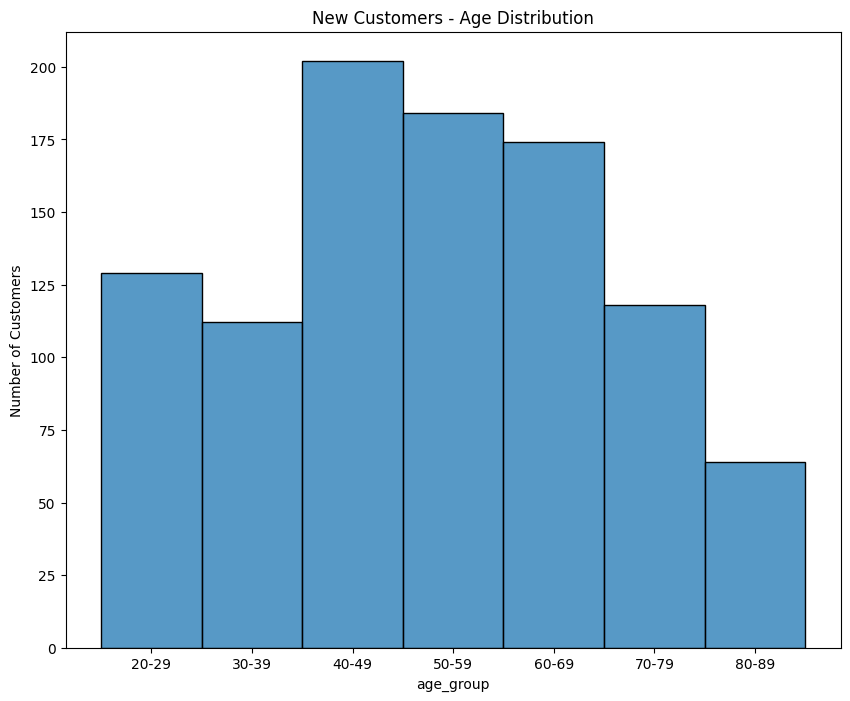

In [26]:
# PLotting out new customers based on their age gourp
plt.figure(figsize=(10,8))
sns.histplot(NewCustomerlst['age_group'], kde=False, bins=15)
plt.xlabel('age_group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

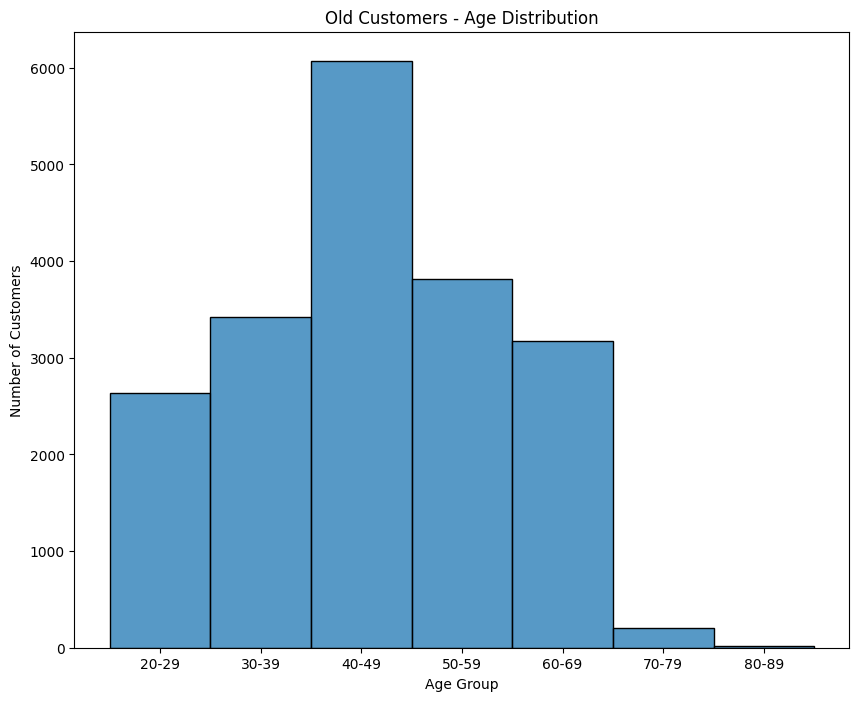

In [27]:
# PLotting out previous customers based on their age gourp
plt.figure(figsize=(10,8))
sns.histplot(cust_trans_rfm['age_group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

Most New / Old Customers are aged between 40-49. The lowest age groups are under 20 and 80+ for both Old and New Customers dataset.
Among the New Customers the most populated age bracket is 20-29 and 60-69. With a spike in new customers from the age 70-79 and 80-89 has proved the effectiveness of the company's current strategies to increase customers' brand awareness from the older age bracket 

## Sales of bikes for by gender

In [28]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10048\3163532592.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}


In [29]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.539471
1,Male,468273,49.460529


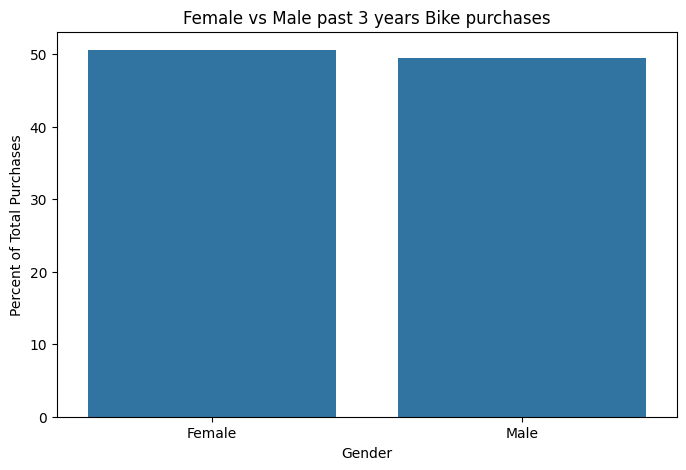

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

Over the last 3 years approximately 51% of the buyers are women and 49% were male buyers.
Female purchases are approximately 10,000 more than male (numerically). Gender wise majority of the bike sales comes from female customers.

## Job Industry Customer Distribution

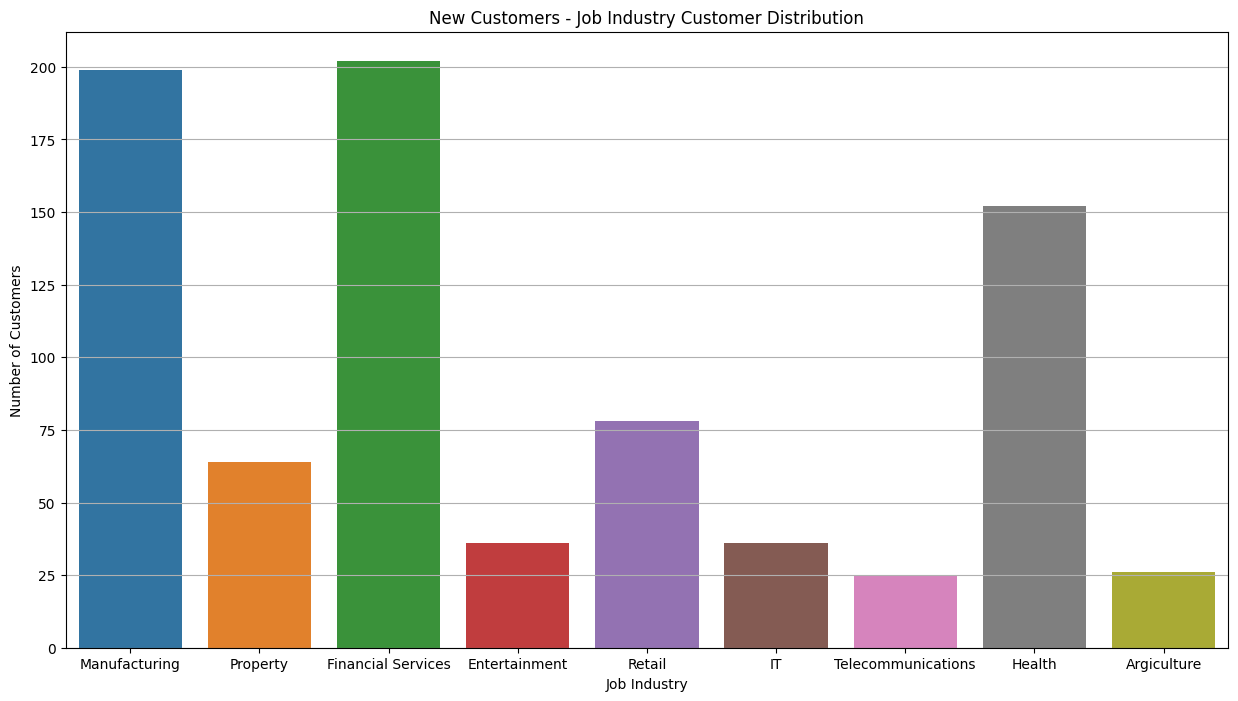

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=NewCustomerlst[~(NewCustomerlst['job_industry_category']=='None')], hue = 'job_industry_category')
plt.grid(axis ='y')
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()

Among the New Customers the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. Similar trend is observed among Old Customers.

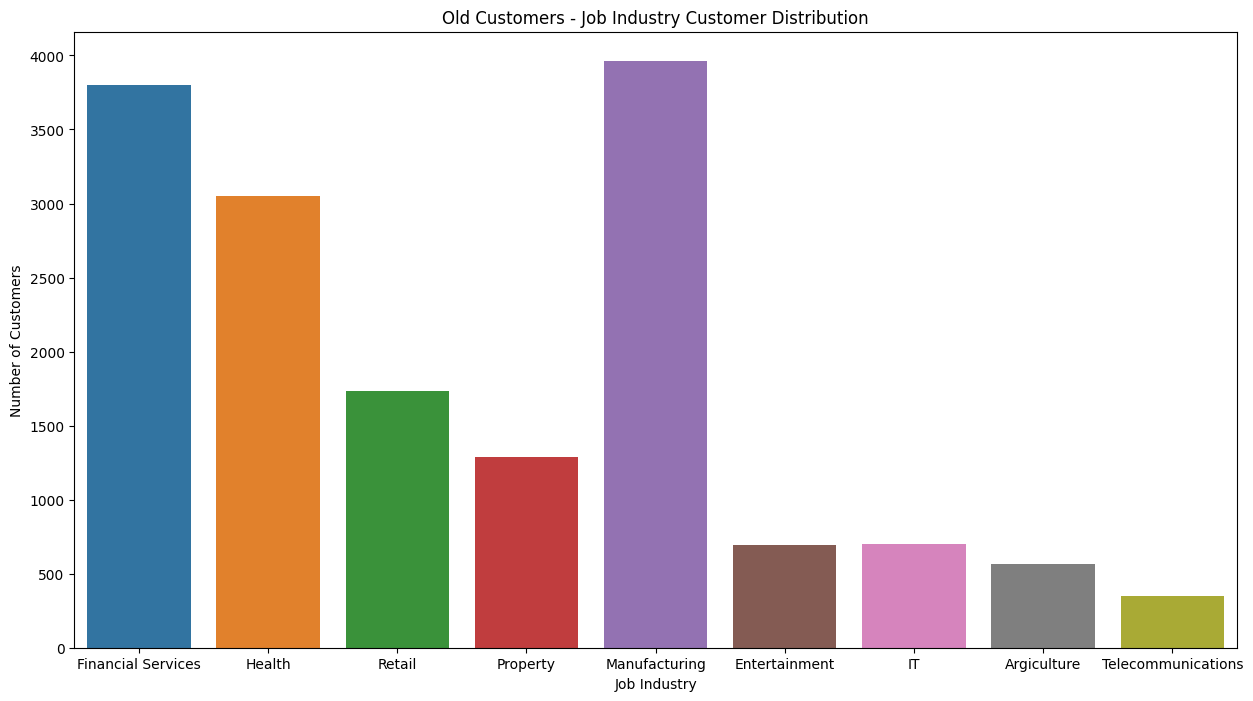

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='None')], hue = 'job_industry_category')
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

## Wealth Segmentation by Age Group

In [33]:
wealth_age_seg_new = NewCustomerlst.groupby(['wealth_segment', 'age_group']).size().reset_index()
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10048\1640054310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wealth_age_seg_new = NewCustomerlst.groupby(['wealth_segment', 'age_group']).size().reset_index()


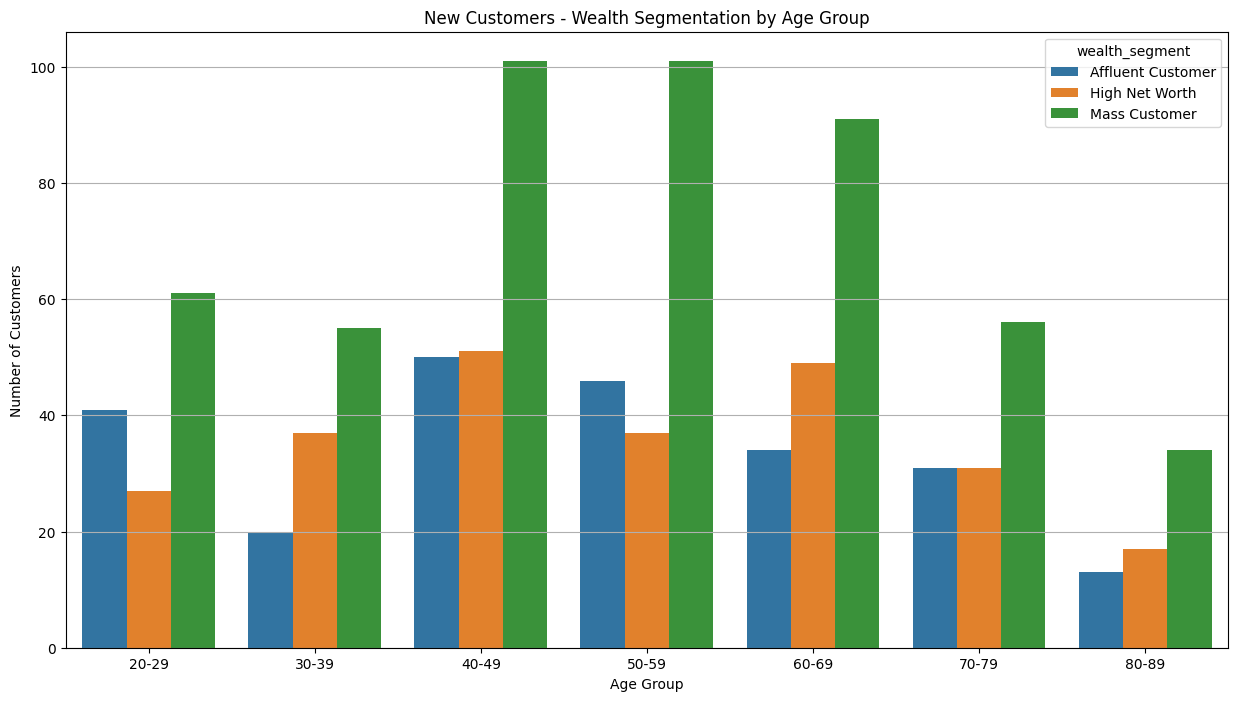

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='age_group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.grid(axis ='y')
plt.show()

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10048\840825641.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'age_group']).size().reset_index()


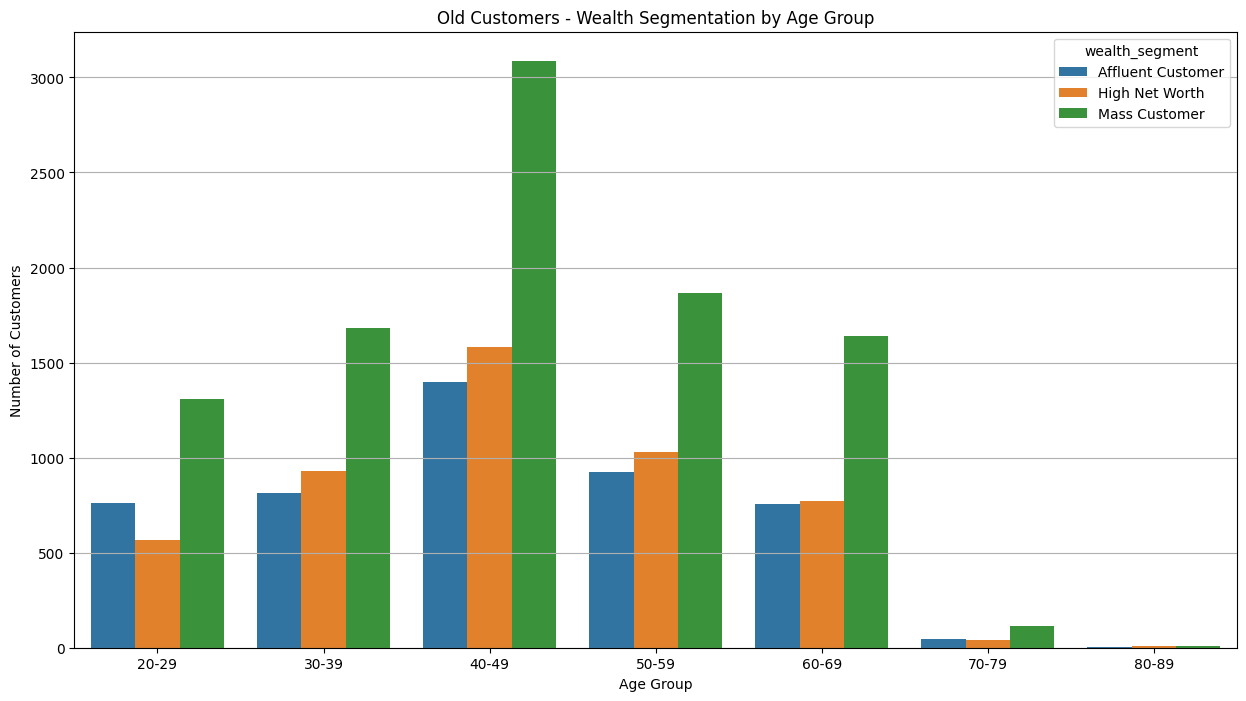

In [35]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'age_group']).size().reset_index()
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x='age_group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.grid(axis ='y')
plt.show()

In the age group 50-59 and 20-29 the 'Affluent Customer' group outperforms 'High Net Worth' group which shows a potential area for future marketing campanign targetting these 2 specific groups

## Recency vs Monetary

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100 days) generated a moderate revenue(2,000$ - 4,000$). Customers who visited 200 days ago generated a low revenue. These 2 variables seems to have a negative correlation.

<Figure size 800x700 with 0 Axes>

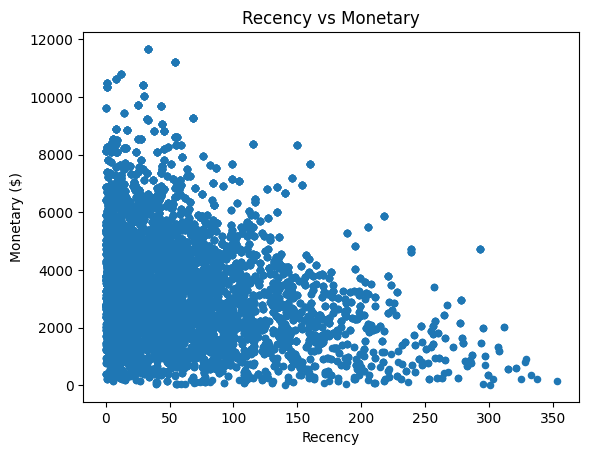

In [36]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

## Frequency vs Monetary

Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" means their visit frequency are higher than the rest of the customer's pool, which correlated with increased revenue for the business.

<Figure size 800x700 with 0 Axes>

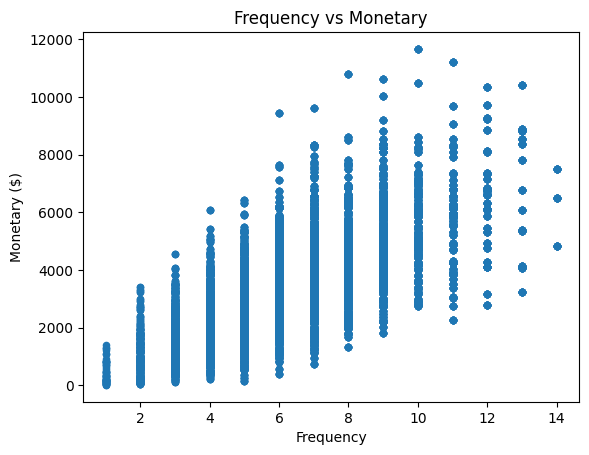

In [37]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

In [38]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19344 non-null  int64         
 1   product_id                           19344 non-null  int64         
 2   customer_id                          19344 non-null  int64         
 3   transaction_date                     19344 non-null  datetime64[ns]
 4   online_order                         19344 non-null  float64       
 5   order_status                         19344 non-null  object        
 6   brand                                19344 non-null  object        
 7   product_line                         19344 non-null  object        
 8   product_class                        19344 non-null  object        
 9   product_size                         19344 non-null  object        
 10  list_price

There is a positive correlation between visit frequency and monetary spend. This means that customers who visit the store more often also tend to spend more money. However, it is difficult to say definitively from this graph whether more frequent visits cause higher spending, or vice versa. It's also important to note that there is a lot of variability in the data, with some high-frequency visitors spending less than some lower-frequency visitors.

## Customer Segment Distribution

In [39]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title', 'rank']).size().reset_index().sort_values('rank')

cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title = cust_per_title.reset_index().set_index('rank')
cust_per_title = cust_per_title.drop('index', axis =1)

In [40]:
cust_per_title.head()

,detail_cust_title,Number of Customers
rank,,
1,Platinum Customer,164
2,Very Loyal,181
3,Becoming Loyal,344
4,Recent Customer,357
5,Potential Customer,339


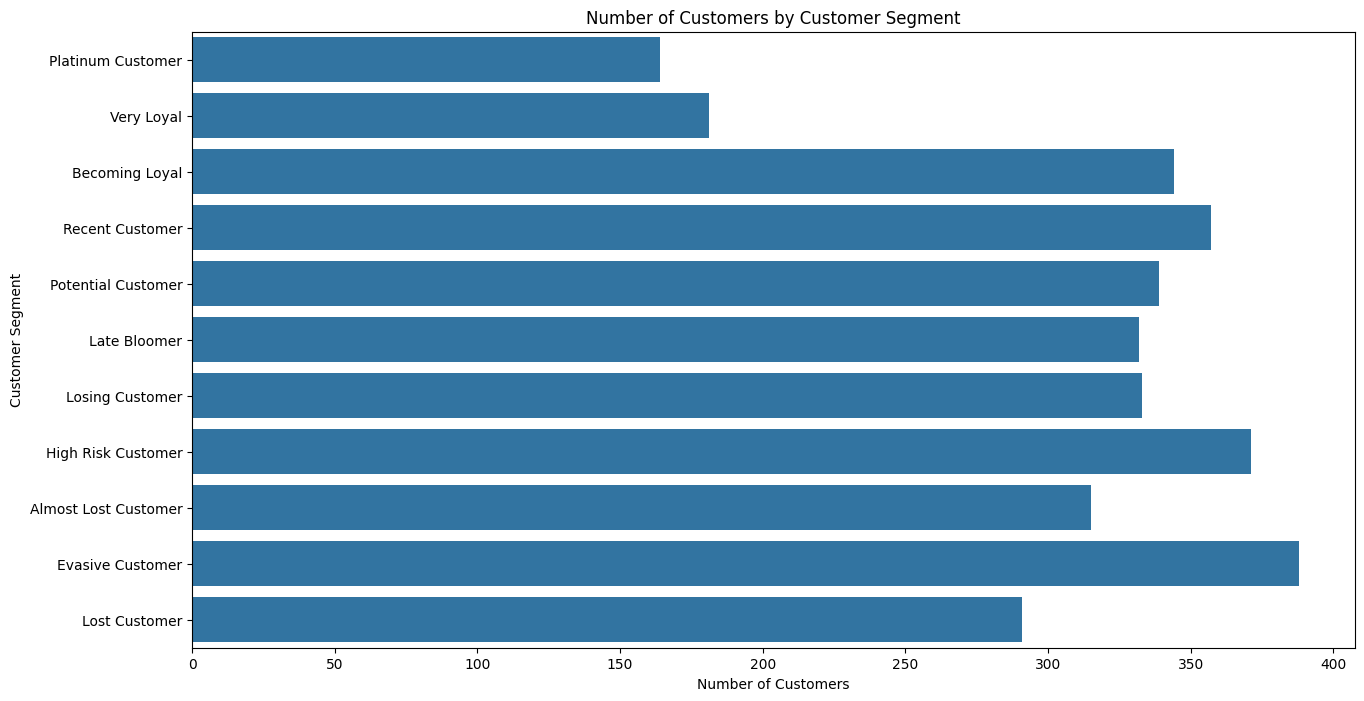

In [41]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

Based on the number of customers that are likely to churn or already classified as lost customers (those from segment Losing customers to Lost customers). To dig further into segments with high churn possibilities, we will take into account customers' wealth as well

In [42]:
cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank', 'wealth_segment']].drop_duplicates().groupby(
    ['detail_cust_title', 'rank', 'wealth_segment']).size().reset_index().sort_values('rank')

cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
# cust_per_title = cust_per_title.reset_index().set_index('rank')
# cust_per_title = cust_per_title.drop('index', axis =1)
cust_per_title = cust_per_title[cust_per_title['detail_cust_title'].isin(['Losing Customer','High Risk Customer','Almost Lost Customer','Evasive Customer','Lost Customer'])]

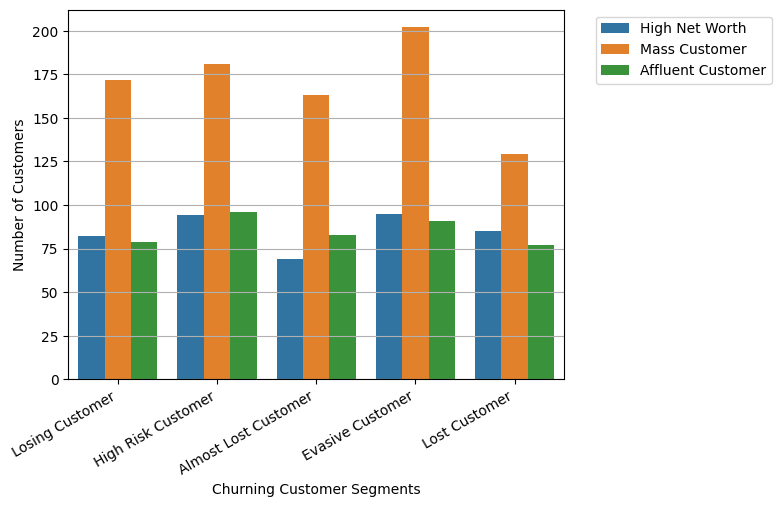

In [43]:
sns.barplot(x='detail_cust_title' , y='Number of Customers', data=cust_per_title, hue = 'wealth_segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel('Churning Customer Segments')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(axis = 'y')
plt.show()

Based on the customer segment visualization chart, the mass customer segment appears to have the lowest churn rate, while the high net worth segment appears to have the highest churn rate. This is counterintuitive, as one might expect high net worth customers to be more invested in their bikes and thus less likely to churn.

In [44]:
cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id', 'wealth_segment','Profit']].drop_duplicates().groupby(
    ['detail_cust_title', 'wealth_segment', 'Profit']).size().reset_index()

cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title = cust_per_title[cust_per_title['detail_cust_title'].isin(['Losing Customer','High Risk Customer','Almost Lost Customer','Evasive Customer','Lost Customer'])]

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10048\1280550661.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='detail_cust_title' , y='Profit', data=cust_per_title, hue = 'wealth_segment', ci=None)


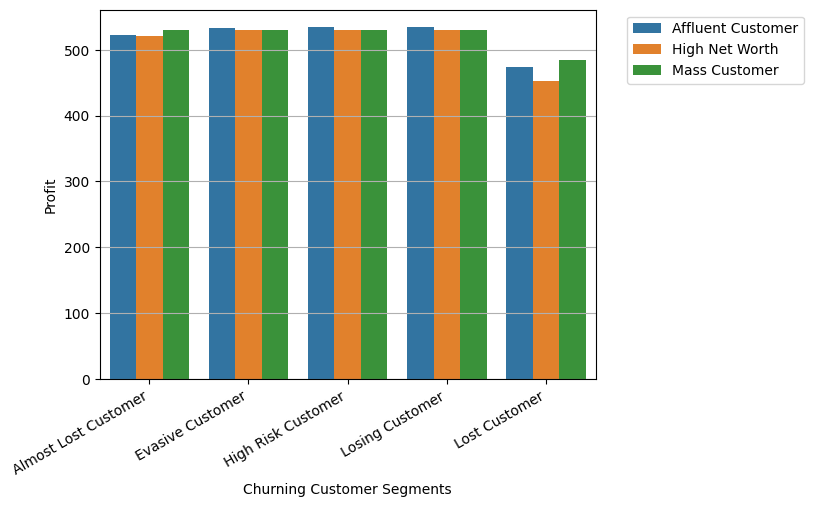

In [45]:
sns.barplot(x='detail_cust_title' , y='Profit', data=cust_per_title, hue = 'wealth_segment', ci=None)
plt.ylabel('Profit')
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel('Churning Customer Segments')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(axis = 'y')
plt.show()

Based on the customer segment visualization chart, the affluent customer segment appears to be the most profitable, with an average profit of $500 per customer. However, this segment also has the highest churn ranking, at "High Risk Customer", which means they are more likely to churn than customers in other segments.

Possible reasons why affluent customers might churn could be:

They are not satisfied with the quality of the bikes they purchased
They feel that they did not receive good customer service
They have found a different bike retailer that they prefer

Goal: increase customer satisfaction and loyalty among affluent customers
Solution: Increase customer satisfaction and loyalty among affluent customers. This could involve offering them exclusive discounts or promotions, providing them with priority service, or giving them access to special events.

In [46]:
# It is possible that the churn rate and profitability of each customer segment could change over time.
# Let's dig deeper using historical data of "Affluent Customer" to see if their churn reason are affected by seasonality or by other reasons mentioned above.
cust_trans_rfm['month'] = cust_trans_rfm['transaction_date'].dt.month # Extract year from transaction column
affluent_cust = cust_trans_rfm[['detail_cust_title', 'customer_id', 'wealth_segment','Profit', 'month']].drop_duplicates().groupby(
    ['month','detail_cust_title','wealth_segment', 'Profit']).size().reset_index()

C:\Users\Hoa Binh\Miniconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Hoa Binh\Miniconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Hoa Binh\Miniconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


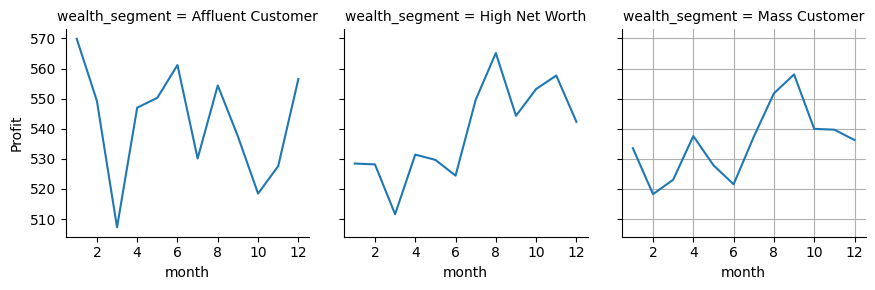

In [47]:
# sns.lineplot(x='month', y='Profit', data=affluent_cust, hue = 'wealth_segment', ci=None)
g = sns.FacetGrid(data=affluent_cust, col='wealth_segment', col_wrap=3)
g.map(sns.lineplot, 'month', 'Profit', ci=None)
plt.ylabel('Profit')
plt.locator_params(axis='x', nbins=8)

plt.grid(True)
plt.show()

The affluent customer segment is the most profitable segment for the company throughout the year. They generate the most profit consistently across all months. The high net worth segment seems to be the least profitable segment, while the mass customer segment falls in between the two in terms of profitability. 
 
While the affluent customer segment  generates the most profit, it is also possible that they could be the most expensive customer segment to acquire or retain. The high net worth segment, while generating the least profit according to the graph,  might have a higher average transaction value,  meaning they could be profitable  if the cost to acquire and retain them is low.